In [684]:
# Libraries
import pandas as pd
from paths_ import Path
import numpy as np

## read dataset

In [685]:
twitter = Path().readfile()

In [686]:
#print(twitter)

## Create dataframe

In [687]:
df_read = pd.read_csv(twitter)
df = df_read.copy(deep=True)

## Data Gathering & Transformation
This is set of setps to figure aout how the data is comming. It is starting to see the shape of the dataframe

In [688]:
df.shape

(1726, 25)

Then, explore the data of the datafrem visualizing a few lines for example 5 of them randomly

In [689]:
# df.sample(5)

Then, list all the columns to start by recognizing more details

In [690]:
# df.columns

Explore the types of each field

In [691]:
# df.dtypes

Explore some fields like: source, sentiment_value, lang, lat,lng, etc

In [692]:
# df['source'].unique()

### Replace NaN values on numerical fields

In [693]:
class FillNaN:
    def __init__(self,dataframe) -> None:
        self.dataframe = dataframe

    def fill_numerical(self):
        self.numerical_column_list = self.dataframe.dtypes[(self.dataframe.dtypes == 'int64') | (self.dataframe.dtypes == 'float64')].index

        for col in self.numerical_column_list:
            self.dataframe[col].replace(np.nan,0,inplace=True)

        return self.dataframe

In [694]:
replace_null = FillNaN(df).fill_numerical()

Watch the outcome

In [695]:
# df.head(5)

### Split City values into City and country fields

In [696]:
# Split City into City and country
df[['City','country']] = df['City'].str.split(',',1,expand=True)

### Replace invalid location descriptions

In [697]:
df['country'].unique()

array(['Mexico', 'Netherlands', 'Egypt', 'Italy', 'Philippines', 'Spain',
       'Romania', 'Colombia', 'Kenya', 'Denmark', 'New Zealand',
       'Luxembourg', 'Peru', 'Cuba', 'Japan', 'Greece', 'Belize',
       'Dominican Republic', 'Argentina', 'Chile', 'Costa Rica',
       'United States', 'Nigeria', 'Switzerland', 'Poland', 'Ecuador',
       None, 'Hungary', 'South Africa', 'Korea, South', 'Angola',
       'Ireland', 'Germany', 'Sweden', 'Senegal', 'France', 'Finland',
       'Croatia', ' and wild boar', 'Belgium', 'Andorra', 'Bolivia',
       'Hong Kong'], dtype=object)

There is an invalid name:' and wild boar'

In [698]:
df[df['country'] == ' and wild boar']

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,statuses_count,favourites_count,account_created_at,verified,sentiment_value,sentiment_dictionary,lat,lng,City,country
272,8.710000e+17,1.430000e+18,"Aug 9, 2021",NeilSalter4,We use 30 year averages to show climatology (a...,Twitter for Android,0.0,0.0,1,0,...,67556,101844,04/06/2017 13:59,0,-5,AFINN,-2.8974,-79.0045,With my family,and wild boar


These coordinates(-2.8974,-79.0045), belong at Cuenca city in Ecuador. [map](https://www.google.com/maps/place/2%C2%B053'50.6%22S+79%C2%B000'16.2%22W/@-2.8989529,-79.0279408,13.82z/data=!4m4!3m3!8m2!3d-2.8974!4d-79.0045)

In [699]:
df['country'].replace({' and wild boar':'Ecuador'},inplace=True)

In [700]:
df['City'].replace({'With my family':'Cuenca'},inplace=True)

In [701]:
df.loc[272]

user_id                                              871000000000000000.0
status_id                                           1430000000000000000.0
created_at                                                    Aug 9, 2021
screen_name                                                   NeilSalter4
text                    We use 30 year averages to show climatology (a...
source                                                Twitter for Android
reply_to_status_id                                                    0.0
reply_to_user_id                                                      0.0
is_retweet                                                              1
favorite_count                                                          0
retweet_count                                                         679
lang                                                                   en
name                                                          Neil Salter
description             #ecosocialism 

In [702]:
df['country'].unique()

array(['Mexico', 'Netherlands', 'Egypt', 'Italy', 'Philippines', 'Spain',
       'Romania', 'Colombia', 'Kenya', 'Denmark', 'New Zealand',
       'Luxembourg', 'Peru', 'Cuba', 'Japan', 'Greece', 'Belize',
       'Dominican Republic', 'Argentina', 'Chile', 'Costa Rica',
       'United States', 'Nigeria', 'Switzerland', 'Poland', 'Ecuador',
       None, 'Hungary', 'South Africa', 'Korea, South', 'Angola',
       'Ireland', 'Germany', 'Sweden', 'Senegal', 'France', 'Finland',
       'Croatia', 'Belgium', 'Andorra', 'Bolivia', 'Hong Kong'],
      dtype=object)

### Rename column 'lng' to 'lon'

In [703]:
# rename column lng
df = df.rename(columns={'lng':'lon'})

### Format column's date

In [704]:
# format column's date
# df[['account_created_at','created_at']]
df['created_at'] = pd.to_datetime(df['created_at'])
df['account_created_at'] = pd.to_datetime(df['account_created_at'])

In [705]:
# df.dtypes

### source - classification as user or a Bot

The characters "bot" and "Bot", both remain on some source data values. They can be at the begining, at the end or between other characters. For this reason It will be applied regex methods to classify and create a new field that show if the source comes from an User or a Bot.

In [706]:
import re

class User_or_bot:
    def __init__(self):
        self.sourceList = list(df['source'])
        self.is_userList = []
    
    def user_evaluation(self):      
        
        for i in range(0,len(self.sourceList)):
    
            if re.search("bot|Bot",self.sourceList[i]):
                self.is_userList.append('Bot')
            else:
                self.is_userList.append('User')
        
        return self.is_userList

In [707]:
df['user_or_bot'] = User_or_bot().user_evaluation()

In [708]:
df['user_or_bot'].unique()

array(['User', 'Bot'], dtype=object)

### Clasificación de sentiment_value

In [709]:
# aplicar codigo para clasificar los valores de sentiment_value
sentimentList = []
for value in list(df['sentiment_value']):
    if value > 0:
        sentimentList.append('Positive') 
    elif value < 0:
        sentimentList.append('Negative') 
    else:
        sentimentList.append('Neutral') 

In [710]:
# print(sentimentList)
df['sentiment'] = sentimentList

In [711]:

df['sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [712]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,account_created_at,verified,sentiment_value,sentiment_dictionary,lat,lon,City,country,user_or_bot,sentiment
402,1.380000e+18,1.430000e+18,2021-08-13,DarkVad87684447,"There is little, at present, in the way of dig...",Twitter for Android,0.0,0.0,1,0,...,2021-12-04 09:11:00,0,-3,AFINN,41.8931,12.4828,Rome,Italy,User,Negative
1317,2.388017e+09,1.430000e+18,2021-08-20,danielegenito,Non ho capito questo cambio di grafica dall’az...,Twitter for Android,0.0,0.0,1,0,...,2014-03-13 22:47:00,0,-4,AFINN,37.3900,-5.9900,Sevilla,Spain,User,Negative
577,1.360000e+18,1.430000e+18,2021-08-17,Jackdanielllss,⚽️ Brentford \n\n✅ Ascender a la máxima catego...,Twitter for iPhone,0.0,0.0,1,0,...,2021-02-18 22:14:00,0,-4,AFINN,24.0889,32.8997,Aswān,Egypt,User,Negative


### Year - Month

In [713]:
def year():
    year = []
    for y in df['created_at'].astype(str):
        year.append(y[:4])
        
    return year
    

In [714]:
df['year'] = year()

In [715]:
def month():
    monthNum = []
    for m in df['created_at'].astype(str):
        monthNum.append(m[5:7])
                
    return monthNum

In [716]:
df['month_num'] = month_num()

In [717]:
df['month'] = df['month_num'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['January','February','March','April','May','June','July','August','September','October','November','December'])

In [733]:
# df['created_at'].unique()

In [718]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,sentiment_dictionary,lat,lon,City,country,user_or_bot,sentiment,year,month_num,month
612,8.613719e+07,1.430000e+18,2021-08-15,Wall_e_Eva,Descripción gráfica de cómo me veo cuando me d...,Twitter for Android,0.000000e+00,0.000000e+00,0,1,...,AFINN,46.5833,26.9167,Bacău,Romania,User,Negative,2021,08,August
1361,2.263701e+08,1.430000e+18,2021-08-20,GretaForse,@ila_b612 Non accetto lezioni di grafica da ch...,Twitter for Android,1.430000e+18,8.830000e+17,0,0,...,AFINN,-1.0833,35.8667,Narok,Kenya,User,Positive,2021,08,August
80,2.564489e+09,1.430000e+18,2021-08-16,Berekade,We use 30 year averages to show climatology (a...,Twitter for iPhone,0.000000e+00,0.000000e+00,1,0,...,AFINN,45.1047,24.3756,Râmnicu Vâlcea,Romania,User,Negative,2021,08,August


### Is retweet
Replace values 0,1 to False and True

In [719]:
df['is_retweet'] = df['is_retweet'].replace({0:False,1:True})

In [720]:
df['is_retweet'].unique()

array([False,  True])

In [721]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,sentiment_dictionary,lat,lon,City,country,user_or_bot,sentiment,year,month_num,month
547,3.223626e+08,1.430000e+18,2021-08-08,Sabuli_2007,"Como no abre bien en Instagram, les pongo la c...",Twitter for iPhone,0.000000e+00,0.000000e+00,True,0,...,AFINN,44.5469,15.3744,Gospić,Croatia,User,Positive,2021,08,August
1081,1.250000e+18,1.430000e+18,2021-08-19,M4RSBAEK,"alcune sono veramente mozzafiato, anche oggi m...",Twitter for iPhone,1.430000e+18,1.250000e+18,False,0,...,AFINN,-17.3935,-66.1570,Cochabamba,Bolivia,User,Negative,2021,08,August
969,8.760350e+07,1.430000e+18,2021-08-14,carohidalgo,@INE_Chile @cndu_chile ▶️ Tal como se muestra ...,Twitter for Android,0.000000e+00,0.000000e+00,True,0,...,AFINN,-4.0500,39.6667,Mombasa,Kenya,User,Negative,2021,08,August


In order to standardize values, score should be calculated for Retweet and Favorite :
* Score Retweet: ([retweet_count]-[Retweet_MIN])/([Retweet_MAX]-[Retweet_MIN])
* Score Favorite: ([favorite_count]-[Favorite_MIN])/([Favorite_MAX]-[Favorite_MIN])

In [722]:
retween_min = df['retweet_count'].min()

In [723]:
retween_max = df['retweet_count'].max()

In [724]:
df['score_retweet'] = (df['retweet_count'] - retween_min) / (retween_max - retween_min) 

In [725]:
favorite_min = df['favorite_count'].min()

In [726]:
favorite_max = df['favorite_count'].max()

In [727]:
df['score_favorite'] = (df['favorite_count'] - favorite_min) / (favorite_max - favorite_min)

In [728]:
df.sample(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,lon,City,country,user_or_bot,sentiment,year,month_num,month,score_retweet,score_favorite
191,5.751116e+08,1.430000e+18,2021-08-26,nicolemark_,@priyankadobhal_ I don’t think my employer car...,Twitter for iPhone,1.430000e+18,1.070000e+18,False,0,...,19.4547,Łódź,Poland,User,Negative,2021,08,August,0.000000,0.000000
1001,1.400000e+18,1.430000e+18,2021-08-24,knmloml,@mmaadwia che paura scritta cosi con questa gr...,Twitter for Android,1.430000e+18,1.400000e+18,False,1,...,11.0328,Erfurt,Germany,User,Positive,2021,08,August,0.000000,0.002865
1556,1.260000e+18,1.420000e+18,2021-08-18,fahimmoledina7,50 Best Python Course for #Developers \n\nhttp...,TwinyBots,0.000000e+00,0.000000e+00,True,0,...,-75.3958,Sincelejo,Colombia,Bot,Negative,2021,08,August,0.006372,0.000000


In [617]:
# df['Normalized'] = df['score_retweet'] / 1

In [730]:
df.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'is_retweet',
       'favorite_count', 'retweet_count', 'lang', 'name', 'description',
       'followers_count', 'friends_count', 'statuses_count',
       'favourites_count', 'account_created_at', 'verified', 'sentiment_value',
       'sentiment_dictionary', 'lat', 'lon', 'City', 'country', 'user_or_bot',
       'sentiment', 'year', 'month_num', 'month', 'score_retweet',
       'score_favorite'],
      dtype='object')

In [619]:
df = df.sort_values('score_retweet',ascending=False)

## Send the normalized dataset to a new csv file

Once the dataframe is cleaned and normalized, it will be send as a new csv file.

In [729]:
# df.to_excel('twitter_clean_data.xlsx',index=False)

In [621]:
# df['norma'] = df['score_retweet'] * 70

In [680]:
# df['rica'] = (df['score_retweet'] / df['score_retweet'].sum()) *100
# df['rica'] = (df['score_retweet'] + df['score_favorite']) / 1726
# df['rica'] = (df['retweet_count'] * df['favorite_count']) / 1726

In [682]:
df = df.sort_values('score_retweet',ascending=False)

In [683]:
df.head(3)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,City,country,user_or_bot,sentiment,year,month_num,month,score_retweet,score_favorite,rica
712,1.370000e+18,1.430000e+18,2021-08-23,carmen_borbaran,La Clínica Las Condes demandando a su ex direc...,Twitter for iPhone,0.0,0.0,True,0,...,Gävle,Sweden,User,Positive,2021,08,August,1.000000,0.0,0.0
308,8.980000e+17,1.430000e+18,2021-08-29,GadioOumoul,We analyzed air quality data gathered by the @...,Twitter Web App,0.0,0.0,True,0,...,Castlebar,Ireland,User,Positive,2021,08,August,0.990442,0.0,0.0
67,1.340000e+18,1.430000e+18,2021-08-06,iPythonistaBot,We analyzed air quality data gathered by the @...,Pythonista Bot,0.0,0.0,True,0,...,Miskolc,Hungary,Bot,Negative,2021,08,August,0.990442,0.0,0.0


## Distribucion de tweets por idioma

In [126]:
# distribution of the tweets by language
tweet_lang = pd.DataFrame(df.groupby('lang',as_index=False)['text'].count())

In [127]:
tweet_lang['lang'] = tweet_lang['lang'].replace({'cy':'Welsh','en':'English','es':'Spanish','fr':'French','it':'Italian','pt':'Portuguese'})

In [128]:
tweet_lang = tweet_lang.sort_values('text',ascending=False)
tweet_lang

,lang,text
1,English,491
2,Spanish,479
4,Italian,442
3,French,312
0,Welsh,1
5,Portuguese,1


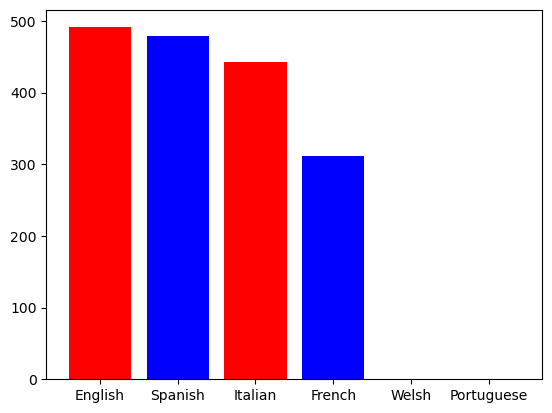

In [129]:
# distribution of the tweets by language
plt.bar(tweet_lang['lang'],tweet_lang['text'], color=['r','b'])
plt.show()

## Distribución geográfica de tweets por sentimiento

In [148]:
df['row_val'] = 1

### Creación de geometría a partir de lat - lon

In [150]:
import geopandas as gpd

In [151]:
gdf_read = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lon,df.lat))

In [152]:
gdf = gdf_read.copy(deep=True)

In [153]:
gdf.head(5)

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,verified,sentiment_value,sentiment_dictionary,lat,lon,City,country,sentiment,geometry,row_val
0,1.150000e+18,1.430000e+18,2021-08-20,sab_loos,So blown away by all the #disaster #dataviz pr...,Twitter for Android,0.0,0.0,0,6,...,0,3,AFINN,20.5875,-100.3928,Querétaro,Mexico,Positive,POINT (-100.39280 20.58750),1
1,1.758731e+07,1.430000e+18,2021-08-27,avyfain,New census data means there's a lot of cool #d...,Twitter Web App,0.0,0.0,0,1,...,0,-3,AFINN,52.5125,6.0944,Zwolle,Netherlands,Negative,POINT (6.09440 52.51250),1
2,9.050000e+17,1.430000e+18,2021-08-30,observablehq,We're thrilled to announce the winners of our ...,Twitter Web App,0.0,0.0,0,11,...,0,2,AFINN,24.0889,32.8997,Aswān,Egypt,Positive,POINT (32.89970 24.08890),1
3,9.050000e+17,1.420000e+18,2021-08-22,observablehq,Tag someone who you think might be interested ...,TweetDeck,0.0,0.0,0,18,...,0,1,AFINN,24.0889,32.8997,Aswān,Egypt,Positive,POINT (32.89970 24.08890),1
4,1.192883e+08,1.430000e+18,2021-08-04,marissaxdexleon,Descripción gráfica de la variante Delta https...,Twitter for iPhone,0.0,0.0,0,0,...,0,-1,AFINN,45.0667,7.7000,Turin,Italy,Negative,POINT (7.70000 45.06670),1


In [177]:
# test = gdf.groupby(['geometry'],as_index=False)['row_val'].count()

In [162]:
test.head(2)

,country,City,sentiment,row_val
0,and wild boar,With my family,Negative,1
1,Andorra,Andorra la Vella,Negative,2


In [170]:
import geopy

In [175]:
# test_locations = gpd.tools.geocode(test.City)

In [137]:
gdf[gdf['country'] == 'Mexico']
gdf[gdf['country'] == 'Mexico'].plot(color='g')

,user_id,status_id,created_at,screen_name,text,source,reply_to_status_id,reply_to_user_id,is_retweet,favorite_count,...,account_created_at,verified,sentiment_value,sentiment_dictionary,lat,lon,City,country,sentiment,geometry
0,1.150000e+18,1.430000e+18,2021-08-20,sab_loos,So blown away by all the #disaster #dataviz pr...,Twitter for Android,0.0,0.0,0,6,...,2019-07-15 02:45:00,0,3,AFINN,20.5875,-100.3928,Querétaro,Mexico,Positive,POINT (-100.39280 20.58750)
21,1.792511e+06,1.430000e+18,2021-08-20,KristinHenry,"Wow, it seems like a lifetime ago when I publi...",Twitter Web App,0.0,0.0,0,11,...,2007-03-21 20:33:00,0,-5,AFINN,25.4333,-101.0000,Saltillo,Mexico,Negative,POINT (-101.00000 25.43330)
22,1.792511e+06,1.420000e+18,2021-08-13,KristinHenry,Playing with negative space in today's #inkyDa...,Twitter Web App,0.0,0.0,0,0,...,2007-03-21 20:33:00,0,5,AFINN,25.4333,-101.0000,Saltillo,Mexico,Positive,POINT (-101.00000 25.43330)
91,1.130000e+18,1.430000e+18,2021-08-10,dannakoto,We use 30 year averages to show climatology (a...,Twitter for Android,0.0,0.0,1,0,...,2019-10-05 10:48:00,0,2,AFINN,20.9700,-89.6200,Mérida,Mexico,Positive,POINT (-89.62000 20.97000)
102,1.300000e+18,1.430000e+18,2021-08-09,GsisOffice,#WhiteboxTools Visualization of the Week\n\nTh...,Twitter Web App,0.0,0.0,1,0,...,2020-08-25 13:04:00,0,-3,AFINN,28.6353,-106.0889,Chihuahua,Mexico,Negative,POINT (-106.08890 28.63530)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1.020000e+18,1.430000e+18,2021-08-21,DanielleLargier,Les systèmes d’assurance chômage sont fondamen...,Twitter for iPhone,0.0,0.0,1,0,...,2018-07-20 00:47:00,0,5,AFINN,29.0989,-110.9542,Hermosillo,Mexico,Positive,POINT (-110.95420 29.09890)
1558,1.350000e+18,1.420000e+18,2021-08-20,CoderRetweet,50 Best Python Course for #Developers \n\nhttp...,CoderRetweet,0.0,0.0,1,0,...,2021-08-01 04:15:00,0,2,AFINN,21.8760,-102.2960,Aguascalientes,Mexico,Positive,POINT (-102.29600 21.87600)
1601,2.766411e+08,1.420000e+18,2021-08-30,emnetter,En attendant que le rapport du #GIEC lui-même ...,Twitter Web App,0.0,0.0,1,0,...,2011-03-04 19:42:00,0,2,AFINN,19.5400,-96.9275,Xalapa,Mexico,Positive,POINT (-96.92750 19.54000)
1634,7.237828e+08,1.420000e+18,2021-08-27,BaldelliAymeri,Félicitations à toutes les personnes impliquée...,Twitter for Android,0.0,0.0,1,0,...,2012-07-29 10:35:00,0,-1,AFINN,19.4333,-99.1333,Mexico City,Mexico,Negative,POINT (-99.13330 19.43330)


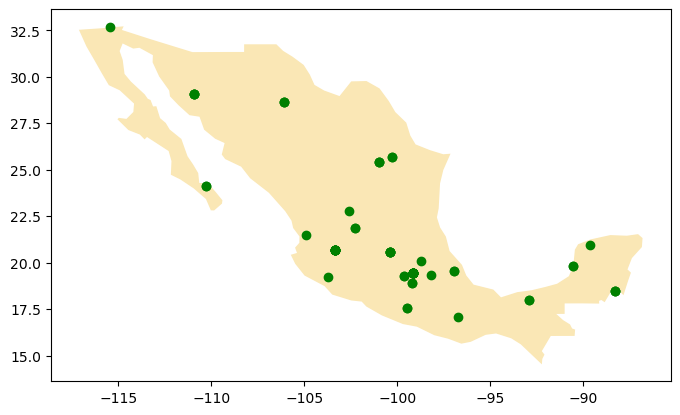

In [34]:
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries[countries["name"] == "Mexico"].plot(color="#fae7b5", ax=ax)

# plot points
gdf[gdf['country'] == 'Mexico'].plot(color='g',ax=ax)

plt.show()

<AxesSubplot: >

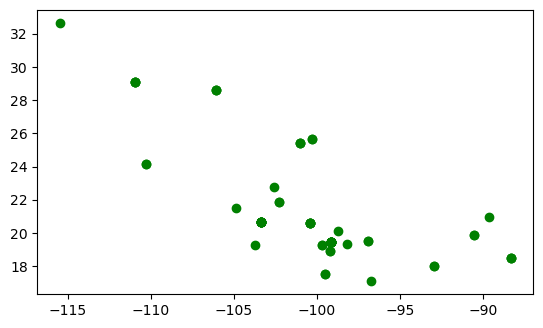

In [31]:
gdf[gdf['country'] == 'Mexico'].plot(color='g')
#df.plot(color='r')

In [32]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<AxesSubplot: >

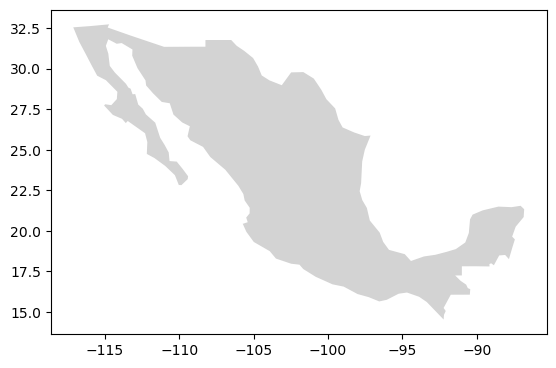

In [33]:
# countries.plot(color='g')
countries[countries["name"] == "Mexico"].plot(color="lightgrey")